In [752]:

# import necessary modules
import datetime
import math

import numpy as np
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import yfinance as yfin
import matplotlib.pyplot as plt

yfin.pdr_override()

In [753]:
# Initialize start and end dates: from 06.01.2005 to 06.06.2022
start = datetime.date(2005, 1, 6)
end = datetime.date(2022, 6, 6)

# Get Case-Shiller Index data
caseshiller_df = pdr.get_data_fred("CSUSHPINSA", start, end)
caseshiller_df = caseshiller_df.rename(columns={"CSUSHPINSA":"CS Index"})

# Get average floating mortgage rate (%) data
floating_df = pdr.get_data_fred("MORTGAGE5US", start, end)
floating_df = floating_df.rename(columns={"MORTGAGE5US":"Avg rate"})
floating_df["Avg rate"] = floating_df["Avg rate"] * 0.01  # convert the values from percent to number

# Create Avg rate volatility dataframe
vol_floating_df = floating_df.rolling(52).std(ddof=1) * np.sqrt(52)  # .. and convert weekly vol to annualized vol
vol_floating_df = vol_floating_df.dropna()  # drop NaN values
vol_floating_df = vol_floating_df.rename(columns={"Avg rate":"Avg rate volatility (annualized)"})

# Get delinquency rate (%) data
delinq_df = pdr.get_data_fred("DRSFRMACBS", start, end)
delinq_df = delinq_df.rename(columns={"DRSFRMACBS":"Delinquency Rate"})
delinq_df["Delinquency Rate"] = delinq_df["Delinquency Rate"] * 0.01  # convert the values from percent to number
# delinq_df.index = delinq_df.index.strftime("%Y-%m-%d")

# Get Fed Funds Rate (%) data
fedfunds_df = pdr.get_data_fred("FEDFUNDS", start, end)
fedfunds_df = fedfunds_df.rename(columns={"FEDFUNDS":"Fed Funds Rate"})
fedfunds_df["Fed Funds Rate"] = fedfunds_df["Fed Funds Rate"] * 0.01  # convert the values from percent to number

# print first few lines of the dataframes
print("Dataframes to be used:")
print("............................................")
print(caseshiller_df.head())
print("____________________________________________")
print(floating_df.head())
print("____________________________________________")
print(vol_floating_df.head())
print("____________________________________________")
print(delinq_df.head())
print("____________________________________________")
print(fedfunds_df.head())

Dataframes to be used:
............................................
            CS Index
DATE                
2005-02-01   161.924
2005-03-01   164.576
2005-04-01   166.999
2005-05-01   169.544
2005-06-01   172.015
____________________________________________
            Avg rate
DATE                
2005-01-06    0.0503
2005-01-13    0.0505
2005-01-20    0.0505
2005-01-27    0.0502
2005-02-03    0.0500
____________________________________________
            Avg rate volatility (annualized)
DATE                                        
2005-12-29                          0.019088
2006-01-05                          0.019389
2006-01-12                          0.019619
2006-01-19                          0.019776
2006-01-26                          0.019830
____________________________________________
            Delinquency Rate
DATE                        
2005-04-01            0.0155
2005-07-01            0.0159
2005-10-01            0.0164
2006-01-01            0.0161
2006-04-01    

## Volatility Challenges in Issuing a Floating Rate Mortgage Bond ##
Elevated floating mortgage rate volatility may lead to increased delinquency and default rates.

Text(-0.15, -0.6, 'Elevated floating mortgage rate volatility may lead to increased delinquency and default rates.')

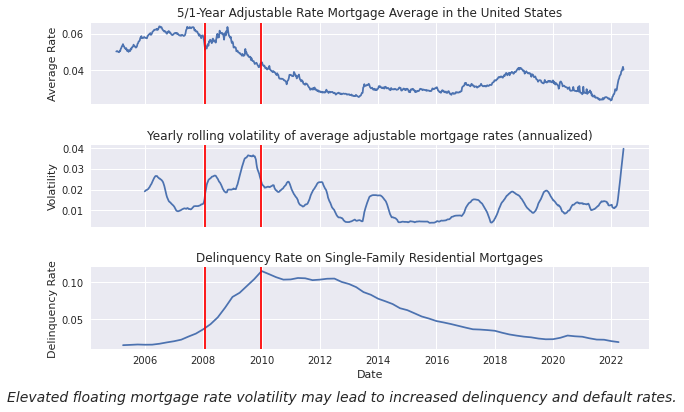

In [759]:
# Plot insights
plt.style.use("seaborn")
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
plt.subplots_adjust(hspace=0.5)


axs[0].plot(floating_df)
axs[0].set_title("5/1-Year Adjustable Rate Mortgage Average in the United States")
axs[0].set_ylabel("Average Rate")
axs[0].axvline(13900, 0, 1, c="r")
axs[0].axvline(14600, 0, 1, c="r")

axs[1].plot(vol_floating_df)
axs[1].set_title("Yearly rolling volatility of average adjustable mortgage rates (annualized)")
axs[1].set_ylabel("Volatility")
axs[1].axvline(13900, 0, 1, c="r")
axs[1].axvline(14600, 0, 1, c="r")

axs[2].plot(delinq_df)
axs[2].set_ylabel("Delinquency Rate")
axs[2].set_title("Delinquency Rate on Single-Family Residential Mortgages")
axs[2].set_xlabel("Date")
axs[2].axvline(13900, 0, 1, c="r")
axs[2].axvline(14600, 0, 1, c="r")
axs[2].text(-0.15, -0.60, "Elevated floating mortgage rate volatility may lead to increased delinquency and default rates.", transform=axs[2].transAxes, fontsize=14, va='center', fontstyle="italic")

## Correlation Challenges in Issuing a Floating Rate Mortgage Bond ##
Decreasing correlation of the adjustable mortgage rates to benchmark rate may lead to increased risk of delinquency and default.

In [755]:
# Initialize start and end dates: from 06.01.2005 to 06.06.2022
start = datetime.date(2005, 1, 6)
end = datetime.date(2022, 6, 6)

# Create MOVE dataframe
move_df = web.DataReader("^MOVE", start, end)["Adj Close"]

# Create TLT dataframe
tlt_df = web.DataReader("TLT", start, end)["Adj Close"]

# Create NFCI dataframe
nfci_df = pdr.get_data_fred("NFCI", start, end)


print(move_df.head())
print("_______________________________________")
print(tlt_df.head())
print("_______________________________________")
print(nfci_df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Date
2005-01-05    93.199997
2005-01-06    92.400002
2005-01-07    92.379997
2005-01-10    79.010002
2005-01-11    77.849998
Name: Adj Close, dtype: float64
_______________________________________
Date
2005-01-05    49.379700
2005-01-06    49.413273
2005-01-07    49.525154
2005-01-10    49.603420
2005-01-11    49.894306
Name: Adj Close, dtype: float64
_______________________________________
               NFCI
DATE               
2005-01-07 -0.70753
2005-01-14 -0.70868
2005-01-21 -0.71185
2005-01-28 -0.71737
2005-02-04 -0.72398


Text(-0.15, -0.5, 'Decreasing correlation of the adjustable mortgage rates to benchmark rate may lead to increased risk of delinquency and default.')

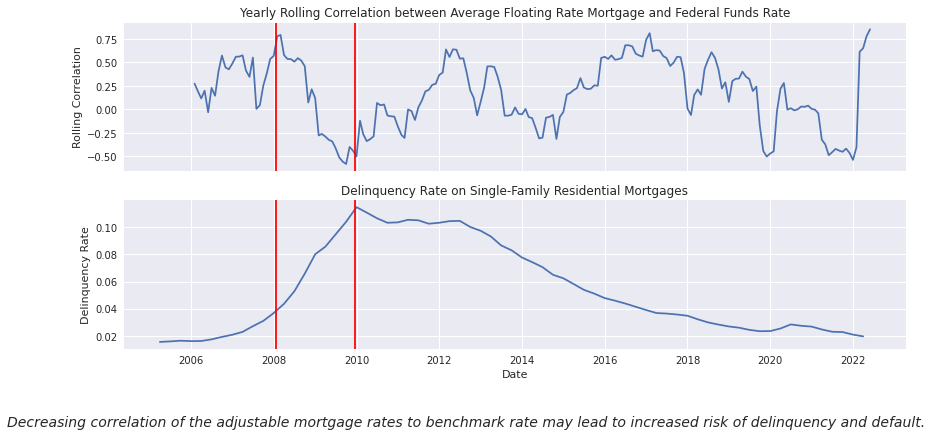

In [756]:
# Resample the frequency of the floating_df to monthly.
floating_df_monthly = floating_df.resample("M").mean()
floating_df_monthly.index = floating_df_monthly.index + pd.Timedelta('1 day')

# Merge floating_df and fedfunds_df dataframes
merged_df = pd.merge(floating_df_monthly, fedfunds_df, left_index=True, right_index=True)  # This is the way to merge dataframes, SAATLER HARCADIM.
merged_df["Avg rate - FFR"] = merged_df["Avg rate"] - merged_df["Fed Funds Rate"]
merged_df_diff = merged_df.pct_change()
#print(merged_df_diff["Avg rate"].rolling(12).corr(merged_df_diff["Fed Funds Rate"]))

# Plot insights
fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)
axs[0].plot(merged_df_diff["Avg rate"].rolling(12).corr(merged_df_diff["Fed Funds Rate"]))
axs[0].set_title("Yearly Rolling Correlation between Average Floating Rate Mortgage and Federal Funds Rate")
axs[0].set_ylabel("Rolling Correlation")
axs[0].axvline(13900, 0, 1, c="r")
axs[0].axvline(14600, 0, 1, c="r")

axs[1].plot(delinq_df)
axs[1].axvline(13900, 0, 1, c="r")
axs[1].axvline(14600, 0, 1, c="r")
axs[1].set_ylabel("Delinquency Rate")
axs[1].set_title("Delinquency Rate on Single-Family Residential Mortgages")
axs[1].set_xlabel("Date")
axs[1].text(-0.15, -0.50, "Decreasing correlation of the adjustable mortgage rates to benchmark rate may lead to increased risk of delinquency and default.", transform=axs[1].transAxes, fontsize=14, va='center', fontstyle="italic")


## Volatility Challenges in Lending of a US Treasury Bond ##
Elevated treasury market volatility makes it harder to forecast a value for the lended bond, thus leading to challenges in collateral requirements.

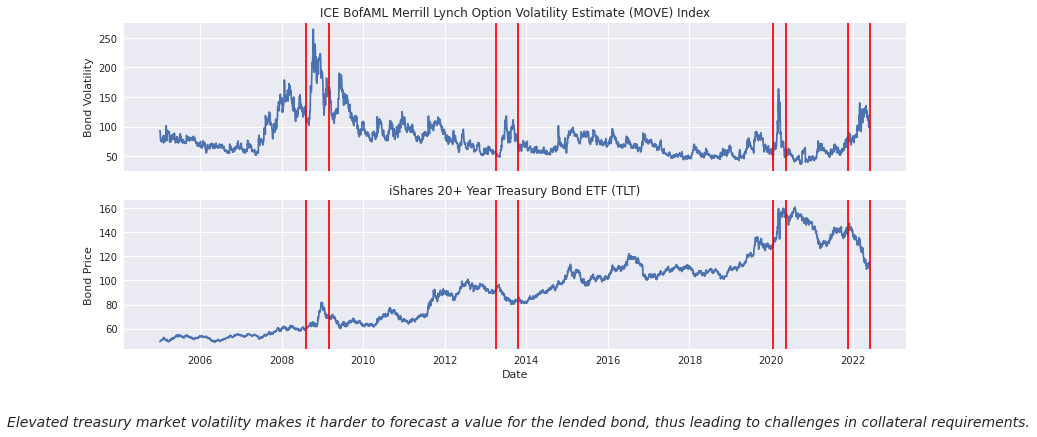

In [757]:
# Plot insights
fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)
axs[0].plot(move_df)
axs[0].set_title("ICE BofAML Merrill Lynch Option Volatility Estimate (MOVE) Index")
axs[0].set_ylabel("Bond Volatility")

axs[0].axvline(14100, 0, 1, c="r")
axs[0].axvline(14300, 0, 1, c="r")
axs[0].axvline(15800, 0, 1, c="r")
axs[0].axvline(16000, 0, 1, c="r")
axs[0].axvline(18280, 0, 1, c="r")
axs[0].axvline(18400, 0, 1, c="r")
axs[0].axvline(18950, 0, 1, c="r")
axs[0].axvline(19150, 0, 1, c="r")

axs[1].plot(tlt_df)
axs[1].set_ylabel("Bond Price")
axs[1].set_title("iShares 20+ Year Treasury Bond ETF (TLT)")
axs[1].set_xlabel("Date")
axs[1].text(-0.15, -0.50, "Elevated treasury market volatility makes it harder to forecast a value for the lended bond, thus leading to challenges in collateral requirements.", transform=axs[1].transAxes, fontsize=14, va='center', fontstyle="italic")

axs[1].axvline(14100, 0, 1, c="r")
axs[1].axvline(14300, 0, 1, c="r")
axs[1].axvline(15800, 0, 1, c="r")
axs[1].axvline(16000, 0, 1, c="r")
axs[1].axvline(18280, 0, 1, c="r")
axs[1].axvline(18400, 0, 1, c="r")
axs[1].axvline(18950, 0, 1, c="r")
axs[1].axvline(19150, 0, 1, c="r")


## Correlation Challenges in Lending of a US Treasury Bond ##
Loosening or tightening of the macroeconomic conditions may influence the value of the bond, thus leading to ambiguity in pricing the lended bond.

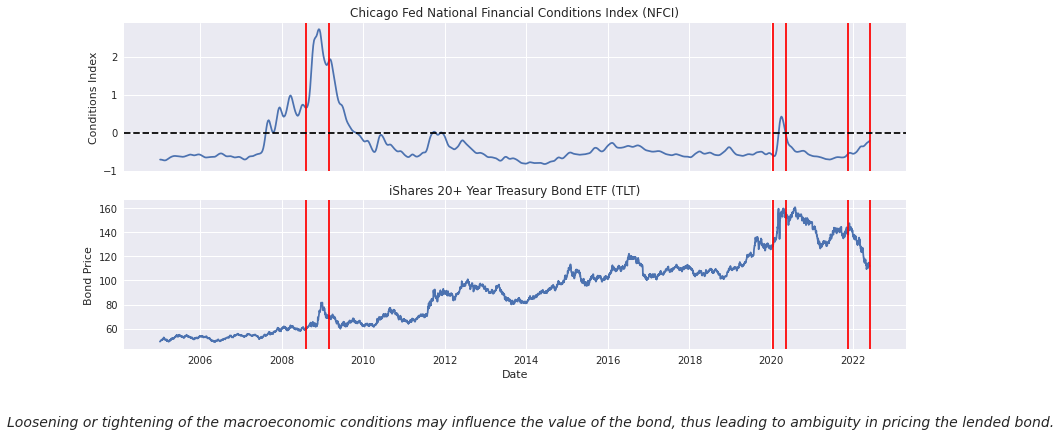

In [758]:
# Plot insights
fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)
axs[0].plot(nfci_df)
axs[0].set_title("Chicago Fed National Financial Conditions Index (NFCI)")
axs[0].set_ylabel("Conditions Index")

axs[0].axvline(14100, 0, 1, c="r")
axs[0].axvline(14300, 0, 1, c="r")
axs[0].axvline(18280, 0, 1, c="r")
axs[0].axvline(18400, 0, 1, c="r")
axs[0].axvline(18950, 0, 1, c="r")
axs[0].axvline(19150, 0, 1, c="r")
axs[0].axhline(0, 0, 19150, color="black", linestyle="--")

axs[1].plot(tlt_df)
axs[1].set_ylabel("Bond Price")
axs[1].set_title("iShares 20+ Year Treasury Bond ETF (TLT)")
axs[1].set_xlabel("Date")
axs[1].text(-0.15, -0.50, "Loosening or tightening of the macroeconomic conditions may influence the value of the bond, thus leading to ambiguity in pricing the lended bond.", transform=axs[1].transAxes, fontsize=14, va='center', fontstyle="italic")

axs[1].axvline(14100, 0, 1, c="r")
axs[1].axvline(14300, 0, 1, c="r")
axs[1].axvline(18280, 0, 1, c="r")
axs[1].axvline(18400, 0, 1, c="r")
axs[1].axvline(18950, 0, 1, c="r")
axs[1].axvline(19150, 0, 1, c="r")